In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d95e6d8d2d73de514c93bb895f30a8ad


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | san miguel
Processing Record 3 of Set 1 | sirjan
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | mtimbira
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | gazojak
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | bandar-e torkaman
City not found. Skipping...
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | carutapera
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | gravdal
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | paralimni
Processing Record 22 of Set 1 | vaini
Proces

Processing Record 42 of Set 4 | erenhot
Processing Record 43 of Set 4 | mapiri
Processing Record 44 of Set 4 | gulabpura
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | vanavara
Processing Record 48 of Set 4 | kawalu
Processing Record 49 of Set 4 | djambala
Processing Record 50 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 1 of Set 5 | gao
Processing Record 2 of Set 5 | mitsamiouli
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | acarau
Processing Record 6 of Set 5 | mosjoen
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | tambopata
Processing Record 10 of Set 5 | saskylakh
Processing Record 11 of Set 5 | khani
Processing Record 12 of Set 5 | billings
Processing Record 13 of Set 5 | sawakin
Processing Record 14 of Set 5 | geraldton
Processing Record

Processing Record 27 of Set 8 | iwanai
Processing Record 28 of Set 8 | phitsanulok
Processing Record 29 of Set 8 | sergeyevka
Processing Record 30 of Set 8 | huarmey
Processing Record 31 of Set 8 | turtkul
City not found. Skipping...
Processing Record 32 of Set 8 | canalete
Processing Record 33 of Set 8 | san carlos del zulia
Processing Record 34 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 35 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 36 of Set 8 | khatanga
Processing Record 37 of Set 8 | nikolskoye
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | tsaratanana
Processing Record 41 of Set 8 | paragominas
Processing Record 42 of Set 8 | moerai
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | kuryk
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | waingapu
Processing Record 47 of Set 8 | an

Processing Record 13 of Set 12 | la sarrosa
Processing Record 14 of Set 12 | luderitz
Processing Record 15 of Set 12 | almora
Processing Record 16 of Set 12 | mul
Processing Record 17 of Set 12 | kovernino
Processing Record 18 of Set 12 | monrovia
Processing Record 19 of Set 12 | moose jaw
Processing Record 20 of Set 12 | kutahya
Processing Record 21 of Set 12 | vila
Processing Record 22 of Set 12 | linhares
Processing Record 23 of Set 12 | dongying
Processing Record 24 of Set 12 | kyren
Processing Record 25 of Set 12 | apolda
Processing Record 26 of Set 12 | klyuchi
Processing Record 27 of Set 12 | kihei
Processing Record 28 of Set 12 | ishikari
Processing Record 29 of Set 12 | rani
Processing Record 30 of Set 12 | phan thiet
Processing Record 31 of Set 12 | shirokiy
Processing Record 32 of Set 12 | severo-yeniseyskiy
Processing Record 33 of Set 12 | filingue
Processing Record 34 of Set 12 | mozarlandia
Processing Record 35 of Set 12 | gosainganj
Processing Record 36 of Set 12 | olga


In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,66.99,95,70,1.01,ZA,2021-02-07 18:10:16
1,San Miguel,13.4833,-88.1833,91.40,49,0,2.80,SV,2021-02-07 18:10:16
2,Sirjan,29.4520,55.6814,50.22,49,4,9.69,IR,2021-02-07 18:15:26
3,Srednekolymsk,67.4500,153.6833,-10.35,85,83,4.68,RU,2021-02-07 18:12:09
4,Mtimbira,-8.7833,36.3500,76.19,85,64,2.55,TZ,2021-02-07 18:15:26
5,Rikitea,-23.1203,-134.9692,77.38,72,96,12.06,PF,2021-02-07 18:10:16
6,Butaritari,3.0707,172.7902,80.64,81,43,18.21,KI,2021-02-07 18:10:16
7,Gazojak,41.1875,61.4036,49.84,61,100,8.81,TM,2021-02-07 18:15:26
8,Chuy,-33.6971,-53.4616,76.53,60,1,9.64,UY,2021-02-07 18:15:27
9,Kununurra,-15.7667,128.7333,78.80,77,75,9.40,AU,2021-02-07 18:14:51


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


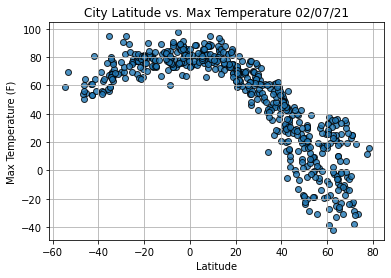

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

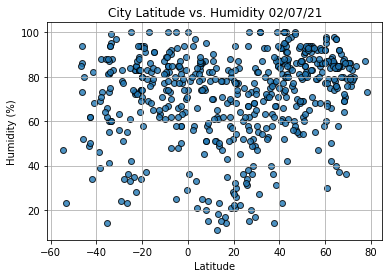

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

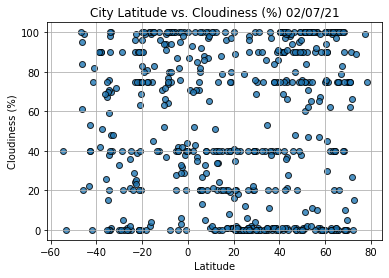

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

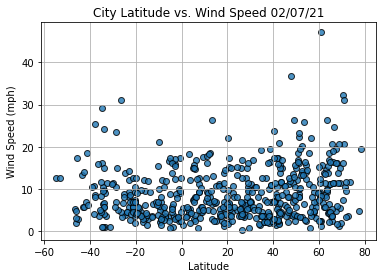

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create Hemispheric DataFrames 6.4.2
index13=city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                       59
Humidity                       47
Cloudiness                     40
Wind Speed                  12.66
Country                        AR
Date          2021-02-07 18:14:22
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
551    False
552     True
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,San Miguel,13.4833,-88.1833,91.40,49,0,2.80,SV,2021-02-07 18:10:16
2,Sirjan,29.4520,55.6814,50.22,49,4,9.69,IR,2021-02-07 18:15:26
3,Srednekolymsk,67.4500,153.6833,-10.35,85,83,4.68,RU,2021-02-07 18:12:09
6,Butaritari,3.0707,172.7902,80.64,81,43,18.21,KI,2021-02-07 18:10:16
7,Gazojak,41.1875,61.4036,49.84,61,100,8.81,TM,2021-02-07 18:15:26


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

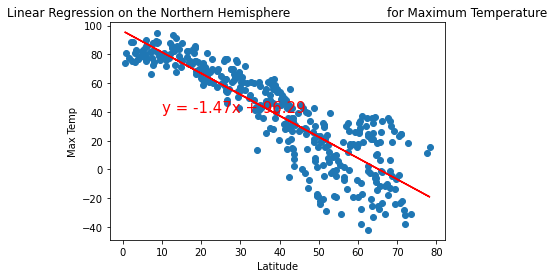

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

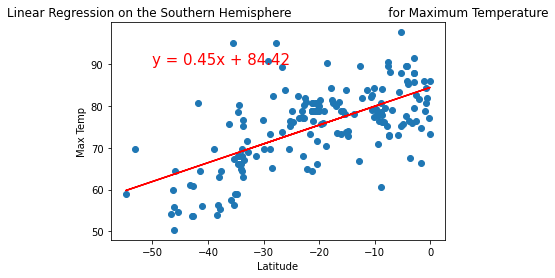

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

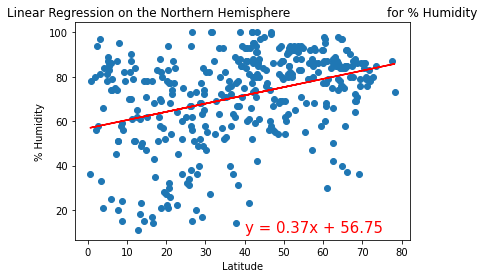

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

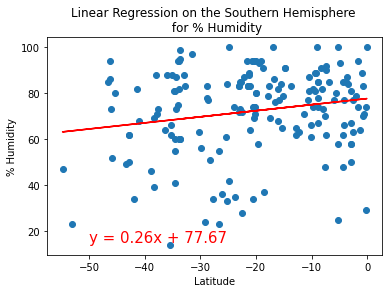

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

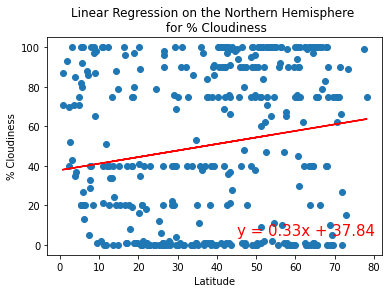

In [48]:
# Skill Drill 6.4.4 Linear Regression on the  Northern Hemisphere %Cloudines
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

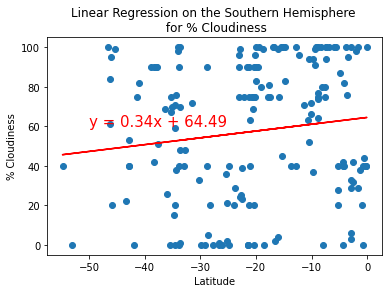

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

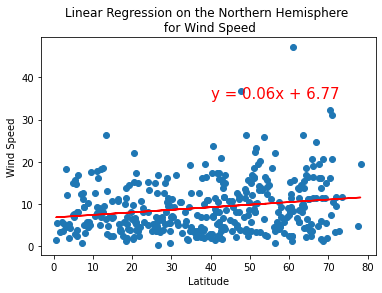

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

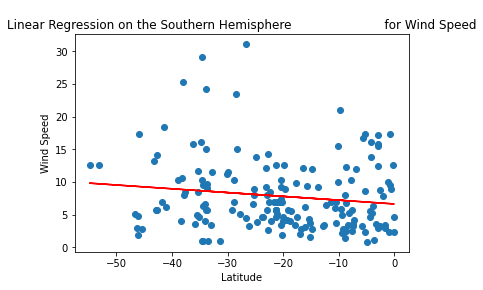

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))